<a href="https://colab.research.google.com/github/PaulaLuana/deep-learning-exercises/blob/master/Exercicio_CNN_Dog_Cat_class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Download dos dados

In [ ]:
from google.colab import files
files.upload()

In [ ]:
!mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
!ls

 cats_vs_dogs_small   kaggle.json   sampleSubmission.csv   train
'kaggle (1).json'     sample_data   test1.zip		   train.zip


In [ ]:
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c dogs-vs-cats

sampleSubmission.csv: Skipping, found more recently modified local copy (use --force to force download)
train.zip: Skipping, found more recently modified local copy (use --force to force download)
test1.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!ls

 cats_vs_dogs_small   kaggle.json   sampleSubmission.csv   train
'kaggle (1).json'     sample_data   test1.zip		   train.zip


In [ ]:
!unzip -qq train.zip

replace train/cat.0.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace train/cat.1.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
A


Exemplo de imagens

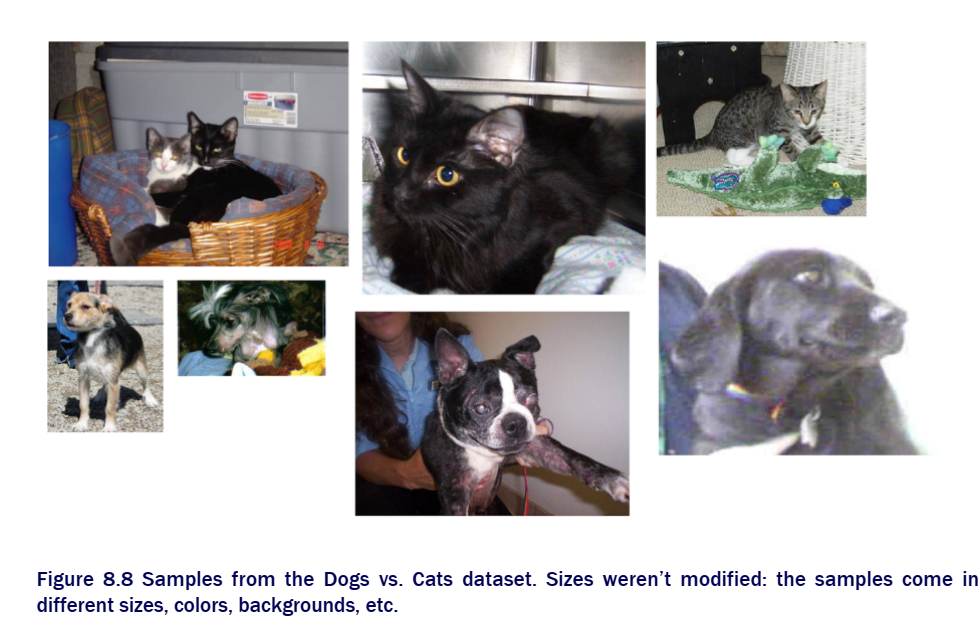

Organizando diretórios para importação

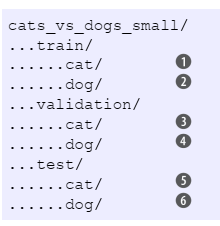

In [ ]:
import os, shutil, pathlib
original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("cats_vs_dogs_small")
def make_subset(subset_name, start_index, end_index):
  for category in ("cat", "dog"):
    dir = new_base_dir / subset_name / category 
    os.makedirs(dir, exist_ok=True)
    fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
    for fname in fnames:
      shutil.copyfile(src=original_dir / fname,
      dst=dir / fname)
make_subset("train", start_index=0, end_index=1000)
make_subset("validation", start_index=1000, end_index=1500)
make_subset("test", start_index=1500, end_index=2500)

In [ ]:
! ls -l cats_vs_dogs_small/

total 12
drwxr-xr-x 4 root root 4096 Dec 14 03:11 test
drwxr-xr-x 4 root root 4096 Dec 14 03:10 train
drwxr-xr-x 4 root root 4096 Dec 14 03:11 validation


In [ ]:
!ls  cats_vs_dogs_small/

test  train  validation


### Construção do modelo



*   Problema de classificação binário
*   Arquitetura CNN: pilha alternada de camadas convolucionais Conv2D (com ativação ReLU) e MaxPooling.



In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
inputs = keras.Input(shape=(180, 180, 3))
x = layers.experimental.preprocessing.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_no_maxpooling = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model_no_maxpooling.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 176, 176, 64)      18496     
                                                                 
 conv2d_2 (Conv2D)           (None, 174, 174, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 172, 172, 256)     295168    
                                                                 
 conv2d_4 (Conv2D)           (None, 170, 170, 256)     590080

1) Altere a arquitetura anterior incluindo após cada camada de convolução uma camada de MaxPooling com pool_size=2 e exiba a estrutura do modelo. Quantos 

In [ ]:
inputs = keras.Input(shape=(180, 180, 3))
x = layers.experimental.preprocessing.Rescaling(1./255)(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 3)        0         
 )                                                               
                                                                 
 conv2d_5 (Conv2D)           (None, 88, 88, 32)        896       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 44, 44, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 42, 42, 64)        1849

In [ ]:
model.compile(loss="binary_crossentropy",
optimizer="rmsprop",
metrics=["accuracy"])

## Processamento dos dados 

In [ ]:
from tensorflow.keras.preprocessing import image_dataset_from_directory
train_dataset = image_dataset_from_directory(
  new_base_dir / "train",
  image_size=(180, 180),
  batch_size=64)
validation_dataset = image_dataset_from_directory(
  new_base_dir / "validation",
  image_size=(180, 180),
  batch_size=64)
test_dataset = image_dataset_from_directory(
  new_base_dir / "test",
  image_size=(180, 180),
  batch_size=64)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


Formato dos dados

In [ ]:
for data_batch, labels_batch in train_dataset:
  print("data batch shape:", data_batch.shape)
  print("labels batch shape:", labels_batch.shape)
  print(labels_batch)
  break


data batch shape: (64, 180, 180, 3)
labels batch shape: (64,)
tf.Tensor(
[1 0 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 1 1 0 1 0 0 1 0 1 0 1 0 1 1
 1 1 1 0 0 1 1 1 1 0 1 0 0 1 1 0 0 1 1 0 0 1 1 0 0 0 1], shape=(64,), dtype=int32)


2) Crie uma função de callback para salvar o modelo com a melhor loss para o conjunto de validação no arquivo  nomeado "convnet_from_scratch.keras". Treine o modelo com 30 épocas, passe o gerador de treino e validação, e a callback como parâmetros.



In [ ]:
callbacks = [
             keras.callbacks.ModelCheckpoint(
                 filepath = "convnet_from_scratch.keras",
                 save_best_only = True,
                 monitor = "val_loss")
]

history = model.fit(
    train_dataset,
    epochs = 30,
    validation_data = validation_dataset,
    callbacks = callbacks,
    shuffle = True
)

Epoch 1/30
32/32 [==============================] - 46s 1s/step - loss: 0.7987 - accuracy: 0.4995 - val_loss: 0.6920 - val_accuracy: 0.5130
Epoch 2/30
32/32 [==============================] - 45s 1s/step - loss: 0.6961 - accuracy: 0.5220 - val_loss: 0.7419 - val_accuracy: 0.5000
Epoch 3/30
32/32 [==============================] - 45s 1s/step - loss: 0.6952 - accuracy: 0.5360 - val_loss: 0.6885 - val_accuracy: 0.5110
Epoch 4/30
32/32 [==============================] - 44s 1s/step - loss: 0.6929 - accuracy: 0.5460 - val_loss: 0.6634 - val_accuracy: 0.6010
Epoch 5/30
32/32 [==============================] - 44s 1s/step - loss: 0.6672 - accuracy: 0.6045 - val_loss: 0.6759 - val_accuracy: 0.5560
Epoch 6/30
32/32 [==============================] - 43s 1s/step - loss: 0.6862 - accuracy: 0.6275 - val_loss: 0.6604 - val_accuracy: 0.6400
Epoch 7/30
32/32 [==============================] - 43s 1s/step - loss: 0.6355 - accuracy: 0.6625 - val_loss: 0.7430 - val_accuracy: 0.5830
Epoch 8/30
32/32 [==

A celula abaixo irá imprimir as curvas de acurácia e loss do treino do modelo.

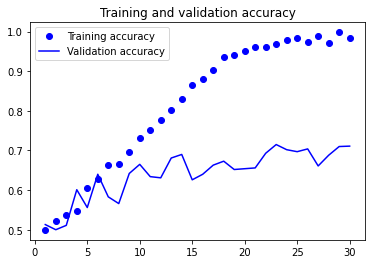

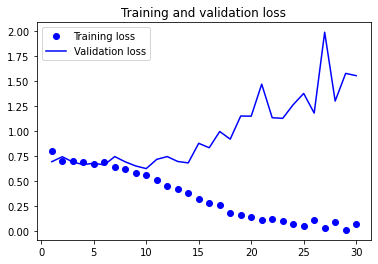

In [ ]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()


3) Carregue o modelo e teste usando o gerador de dados de teste.

In [ ]:
test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}") 

32/32 [==============================] - 12s 360ms/step - loss: 0.6476 - accuracy: 0.6435
Test accuracy: 0.643



### Usando data augmentation

O overfitting é causado por ter poucas amostras para 
aprender, tornando você incapaz de treinar um
modelo que pode generalizar para novos dados. O 
o aumento dos ddos é uma abordagem usada para gerar mais dados de treinamento a partir de amostras de treinamento existentes, aumentando as amostras por meio de uma série de transformações aleatórias que produzem
imagens de aparência verossímil. O objetivo é que na hora do treinamento, seu modelo nunca verá o exato
mesma imagem duas vezes. Isso ajuda a expor o modelo a mais aspectos dos dados e generalizar melhor.

4) Crie uma camada para aumento de dados com RandomFlip horizontal, rotação de até 0.2 e zoom de até 0.3.

In [ ]:
data_augmentation = keras.Sequential(
  [
  layers.experimental.preprocessing.RandomFlip("horizontal"),
  layers.experimental.preprocessing.RandomRotation(0.2),
  layers.experimental.preprocessing.RandomZoom(0.3),


  ]
  )

Exemplo de imagem aumentada

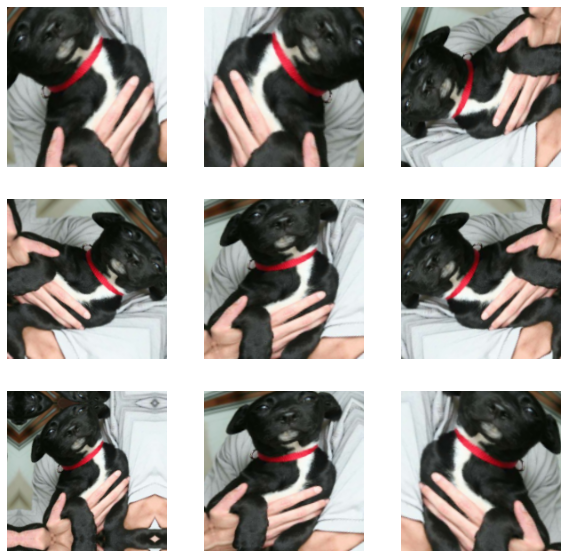

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

Altere a arquitetura anterior incluindo a camada de aumento e uma camada de dropout. 

In [ ]:
inputs = keras.Input(shape=(180, 180, 3))
x = layers.experimental.preprocessing.Rescaling(1./255)(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(loss="binary_crossentropy",
optimizer="rmsprop",
metrics=["accuracy"])

In [ ]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 90, 90, 3)        0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 88, 88, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 44, 44, 32)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 42, 42, 64)        1849

5) Treine o modelo com 100 épocas e salve o modelo no arquivo "convnet_from_scratch_with_augmentation.keras" utilizando o callback, assim como no modelo anterior. 

In [ ]:
callbacks = [
             keras.callbacks.ModelCheckpoint(
                 filepath = "convnet_from_scratch_with_augmentation.keras",
                 save_best_only = True,
                 monitor = "val_loss")
]

history = model.fit(
    train_dataset,
    epochs = 100,
    validation_data = validation_dataset,
    callbacks = callbacks
)

Epoch 1/100
32/32 [==============================] - 47s 1s/step - loss: 0.6995 - accuracy: 0.4965 - val_loss: 0.6905 - val_accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 47s 1s/step - loss: 0.6868 - accuracy: 0.5555 - val_loss: 0.6746 - val_accuracy: 0.5790
Epoch 3/100
32/32 [==============================] - 51s 2s/step - loss: 0.6841 - accuracy: 0.5875 - val_loss: 0.6984 - val_accuracy: 0.5280
Epoch 4/100
32/32 [==============================] - 46s 1s/step - loss: 0.6578 - accuracy: 0.6295 - val_loss: 0.9402 - val_accuracy: 0.5230
Epoch 5/100
32/32 [==============================] - 46s 1s/step - loss: 0.6689 - accuracy: 0.6310 - val_loss: 0.6568 - val_accuracy: 0.5880
Epoch 6/100
32/32 [==============================] - 44s 1s/step - loss: 0.5967 - accuracy: 0.6835 - val_loss: 0.6637 - val_accuracy: 0.6120
Epoch 7/100
32/32 [==============================] - 44s 1s/step - loss: 0.5951 - accuracy: 0.6845 - val_loss: 0.6715 - val_accuracy: 0.5960
Epoch 8/100
3

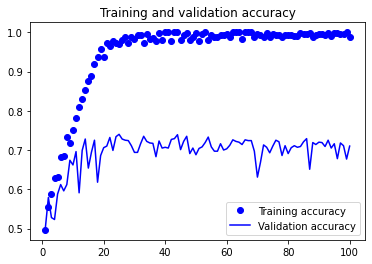

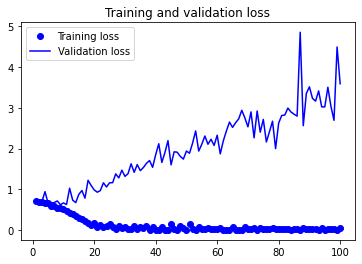

In [ ]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [ ]:
test_model = keras.models.load_model(
"convnet_from_scratch_with_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 13s 376ms/step - loss: 0.6199 - accuracy: 0.6715
Test accuracy: 0.672
